In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from pprint import pprint

In [9]:
data_df=pd.read_csv("Google-Playstore-32K.csv")
data_df=data_df.dropna()
data_df=data_df.rename(columns={"App Name":"App_Name"})
data_df.head()

,App_Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device


In [10]:
#clean raw data
data_df=data_df[~data_df.App_Name.str.contains("?",regex=False)]

In [10]:
# cleaned_category_df = data_df
# cleaned_category_df["Category"]=cleaned_category_df["Category"].str.split("_").str[0]

In [11]:
#clean install number
cleaned_df = data_df
cleaned_df["Installs"] = cleaned_df['Installs'].str.split("+").str[0]
cleaned_df["Installs"] = cleaned_df["Installs"].replace(',', "", regex=True)
cleaned_df["Installs"] = cleaned_df["Installs"].astype(float)
cleaned_df

,App_Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,5000000.0,Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,100000000.0,Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,100000.0,1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,10000000.0,16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,10000.0,Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device
5,Safeway Online Shopping,FOOD_AND_DRINK,3.82532239,2559.0,100000.0,23M,0,Everyone,"March 29, 2019",5.0 and up,7.6.0
6,"Yelp: Food, Shopping, Services Nearby",TRAVEL_AND_LOCAL,4.267267704,421918.0,10000000.0,Varies with device,0,Teen,"March 28, 2019",Varies with device,Varies with device
7,Talabat: Food Delivery,FOOD_AND_DRINK,4.495084763,142618.0,5000000.0,Varies with device,0,Everyone,"March 31, 2019",Varies with device,Varies with device
8,Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811764717,85.0,10000.0,4.1M,0,Everyone,"February 10, 2019",4.3 and up,2.4
9,Allrecipes Dinner Spinner,FOOD_AND_DRINK,4.545353413,67514.0,5000000.0,Varies with device,0,Everyone,"March 7, 2019",Varies with device,Varies with device


In [36]:
# clean price
cleaned_df["Price"] = cleaned_df["Price"].str.replace("$","").astype(float)

In [15]:
# clean rating
cleaned_df = cleaned_df[cleaned_df["Rating"] != 'NEWS_AND_MAGAZINES']
cleaned_df = cleaned_df[cleaned_df["Rating"] != 'GAME_STRATEGY']

In [19]:
cleaned_df["Rating"] = cleaned_df["Rating"].astype(float)
cleaned_df.head()

,App_Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034.0,5000000.0,Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922.0,100000000.0,Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329,1967.0,100000.0,1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,10000000.0,16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,2291.0,10000.0,Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device


In [24]:
#finish data cleaning 
cleaned_df=cleaned_df.rename(columns={"App_Name":"App Name"})
cleaned_df=cleaned_df[~cleaned_df.Category.str.contains(")",regex=False)]
cleaned_df=cleaned_df[~cleaned_df.Category.str.contains("Channel 2 News",regex=False)]

In [25]:
# cleaned_df1 is for general categories
cleaned_df1 = cleaned_df.replace(
    {"GAME_PUZZLE": "GAME",
"GAME_CASUAL": "GAME",
"GAME_ARCADE": "GAME",
"GAME_ACTION": "GAME",
"GAME_SIMULATION": "GAME",
"GAME_CARD": "GAME",
"GAME_EDUCATIONAL": "GAME",
"GAME_ROLE_PLAYING": "GAME",
"GAME_STRATEGY": "GAME",
"GAME_RACING": "GAME",
"GAME_ADVENTURE": "GAME",
"GAME_SPORTS": "GAME",
"GAME_WORD": "GAME",
"GAME_BOARD": "GAME",
"GAME_CASINO": "GAME",
"GAME_TRIVIA": "GAME",
"GAME_MUSIC": "GAME",
})
cleaned_df1["Category"].value_counts()

GAME                   6842
EDUCATION              2950
TOOLS                  2287
ENTERTAINMENT          1827
BOOKS_AND_REFERENCE    1299
FINANCE                1234
MUSIC_AND_AUDIO        1160
LIFESTYLE              1129
PRODUCTIVITY           1054
BUSINESS                967
PERSONALIZATION         794
HEALTH_AND_FITNESS      775
NEWS_AND_MAGAZINES      744
TRAVEL_AND_LOCAL        678
PHOTOGRAPHY             629
COMMUNICATION           595
SPORTS                  588
SHOPPING                554
MEDICAL                 479
FOOD_AND_DRINK          407
SOCIAL                  390
MAPS_AND_NAVIGATION     331
VIDEO_PLAYERS           311
AUTO_AND_VEHICLES       201
WEATHER                 194
ART_AND_DESIGN          157
HOUSE_AND_HOME          106
DATING                   99
EVENTS                   89
PARENTING                87
BEAUTY                   76
COMICS                   69
LIBRARIES_AND_DEMO       54
Name: Category, dtype: int64

In [26]:
apps=cleaned_df1.groupby(["Category"])
review_category=apps["Reviews"].sum()/1000
review_category

Category
ART_AND_DESIGN            2598.693
AUTO_AND_VEHICLES         1409.875
BEAUTY                     562.482
BOOKS_AND_REFERENCE      25432.227
BUSINESS                 16471.858
COMICS                    2206.722
COMMUNICATION           320392.709
DATING                    3354.782
EDUCATION                29053.906
ENTERTAINMENT            73035.083
EVENTS                     210.719
FINANCE                  40649.084
FOOD_AND_DRINK           11851.023
GAME                   1340728.091
HEALTH_AND_FITNESS       31751.385
HOUSE_AND_HOME            3457.277
LIBRARIES_AND_DEMO        1062.018
LIFESTYLE                22049.657
MAPS_AND_NAVIGATION      25625.874
MEDICAL                   2187.677
MUSIC_AND_AUDIO          85341.026
NEWS_AND_MAGAZINES       30292.663
PARENTING                 1526.230
PERSONALIZATION          57129.901
PHOTOGRAPHY             123959.144
PRODUCTIVITY             85509.321
SHOPPING                 70145.832
SOCIAL                  264125.503
SPORTS     

In [27]:
category_key=apps.groups.keys()

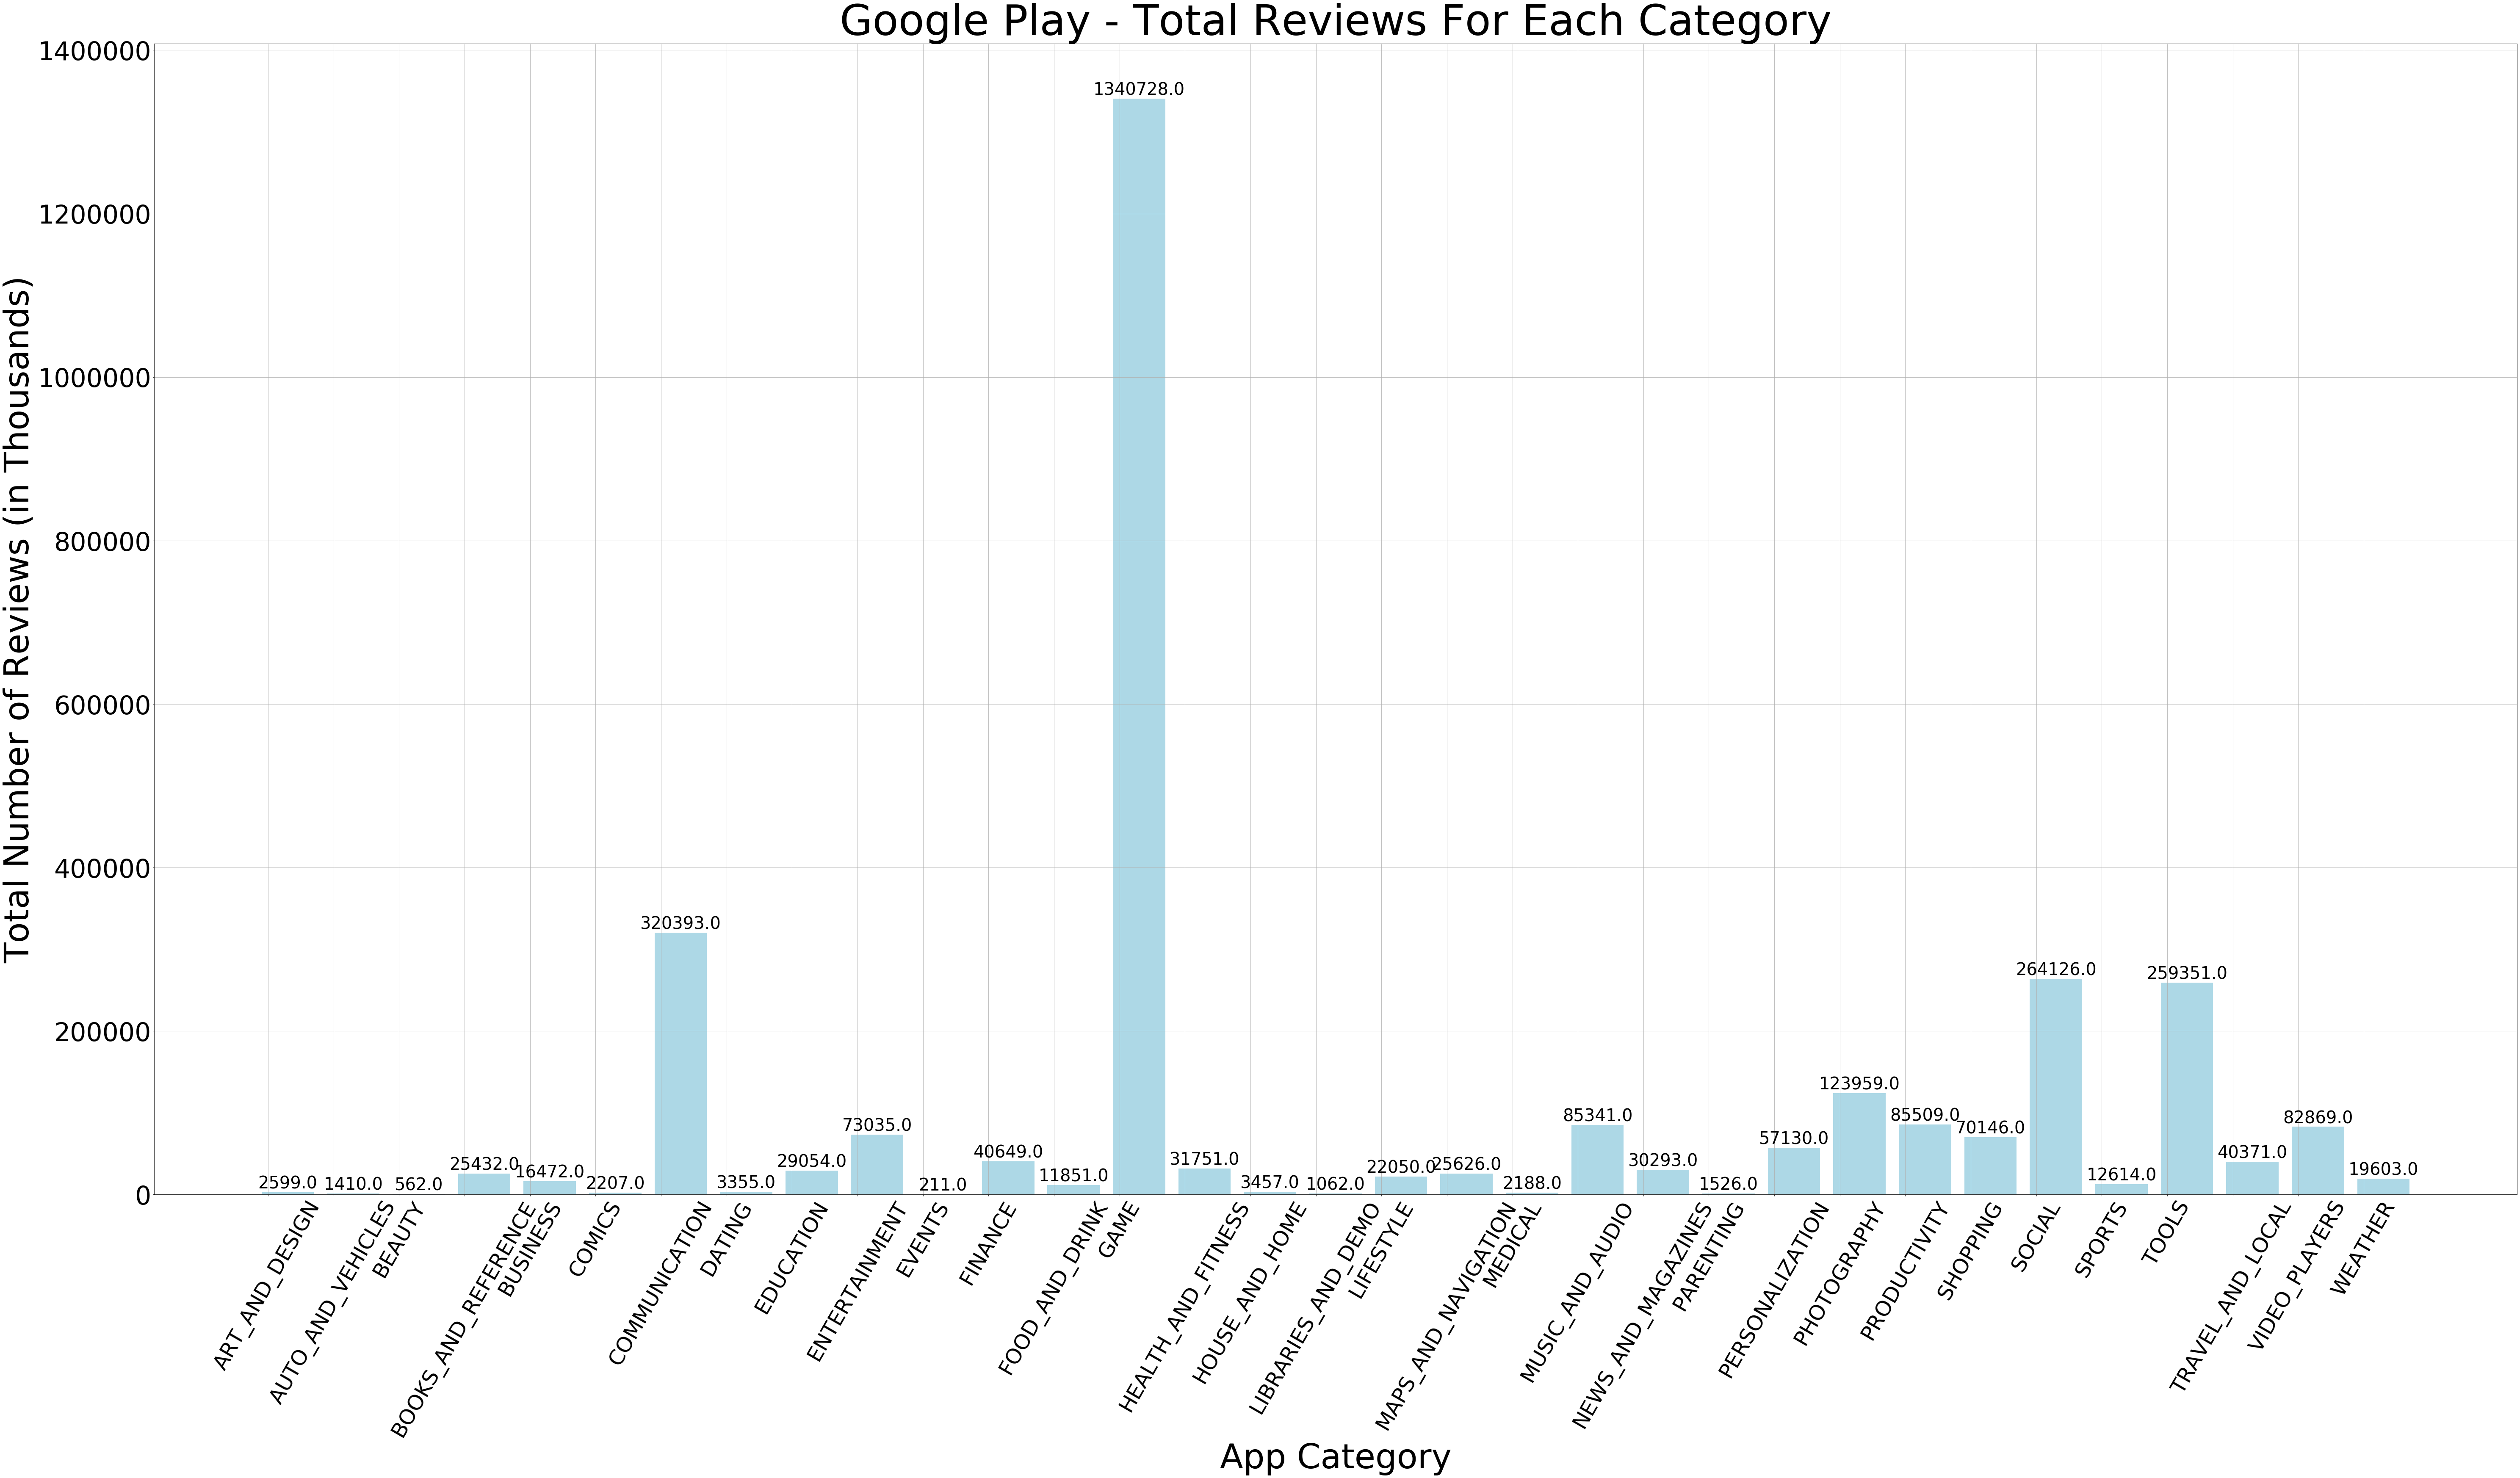

In [28]:
fig, ax = plt.subplots(figsize=(100,50))
x_index = np.arange(len(apps["Reviews"]))  
total_review = ax.bar(x_index[0:], review_category[0:], color='lightblue')
ax.set_title('Google Play - Total Reviews For Each Category',fontsize=100)
ax.set_ylabel('Total Number of Reviews (in Thousands)',fontsize=80)
ax.set_xlabel('App Category',fontsize=80)
ax.set_xticks(x_index-0.3)
ax.tick_params(axis="y", labelsize=60)
ax.set_xticklabels(category_key,fontsize=50,rotation=60)
ax.grid(True)
def label(numbers,fontsize,labelheight):
    for x in numbers:
        height = x.get_height()
        xloc=x.get_x() + x.get_width() / 2
        label=(f'{round(height,0)}')
        ax.text(xloc,height+labelheight,label,ha='center', va='bottom',color="black",fontsize=fontsize)
label(total_review,40,100)

In [124]:
fig.savefig("Results/Category vs. Total Review.png")

In [47]:
game_df= cleaned_df.replace('_', ' ', regex=True)
game_df=game_df[game_df['Category'].str.contains('GAME', regex=False)]
game_df.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
46,King of Crabs,GAME ACTION,3.280255,785.0,500000.0,72M,0.0,Everyone 10+,"March 7, 2019",4.4 and up,1.0.8
47,Match 3 App Rewards: Daily Game Rewards,GAME CASUAL,4.520161,248.0,10000.0,23M,0.0,Everyone,"February 20, 2019",4.3 and up,4.1.1
48,Brown Dust,GAME ROLE PLAYING,4.476288,70260.0,1000000.0,81M,0.0,Teen,"April 1, 2019",4.4 and up,1.38.7
49,Poly - Coloring Puzzle Art Book,GAME PUZZLE,4.580865,878.0,10000.0,44M,0.0,Everyone,"March 28, 2019",4.1 and up,1.5
50,Legend of Empress,GAME ROLE PLAYING,3.820000,750.0,50000.0,24M,0.0,Teen,"March 30, 2019",4.0 and up,1.0.4


In [30]:
game_sub=game_df.groupby("Category")
game_review=game_sub["Reviews"].sum()/1000
game_key=game_sub.groups.keys()

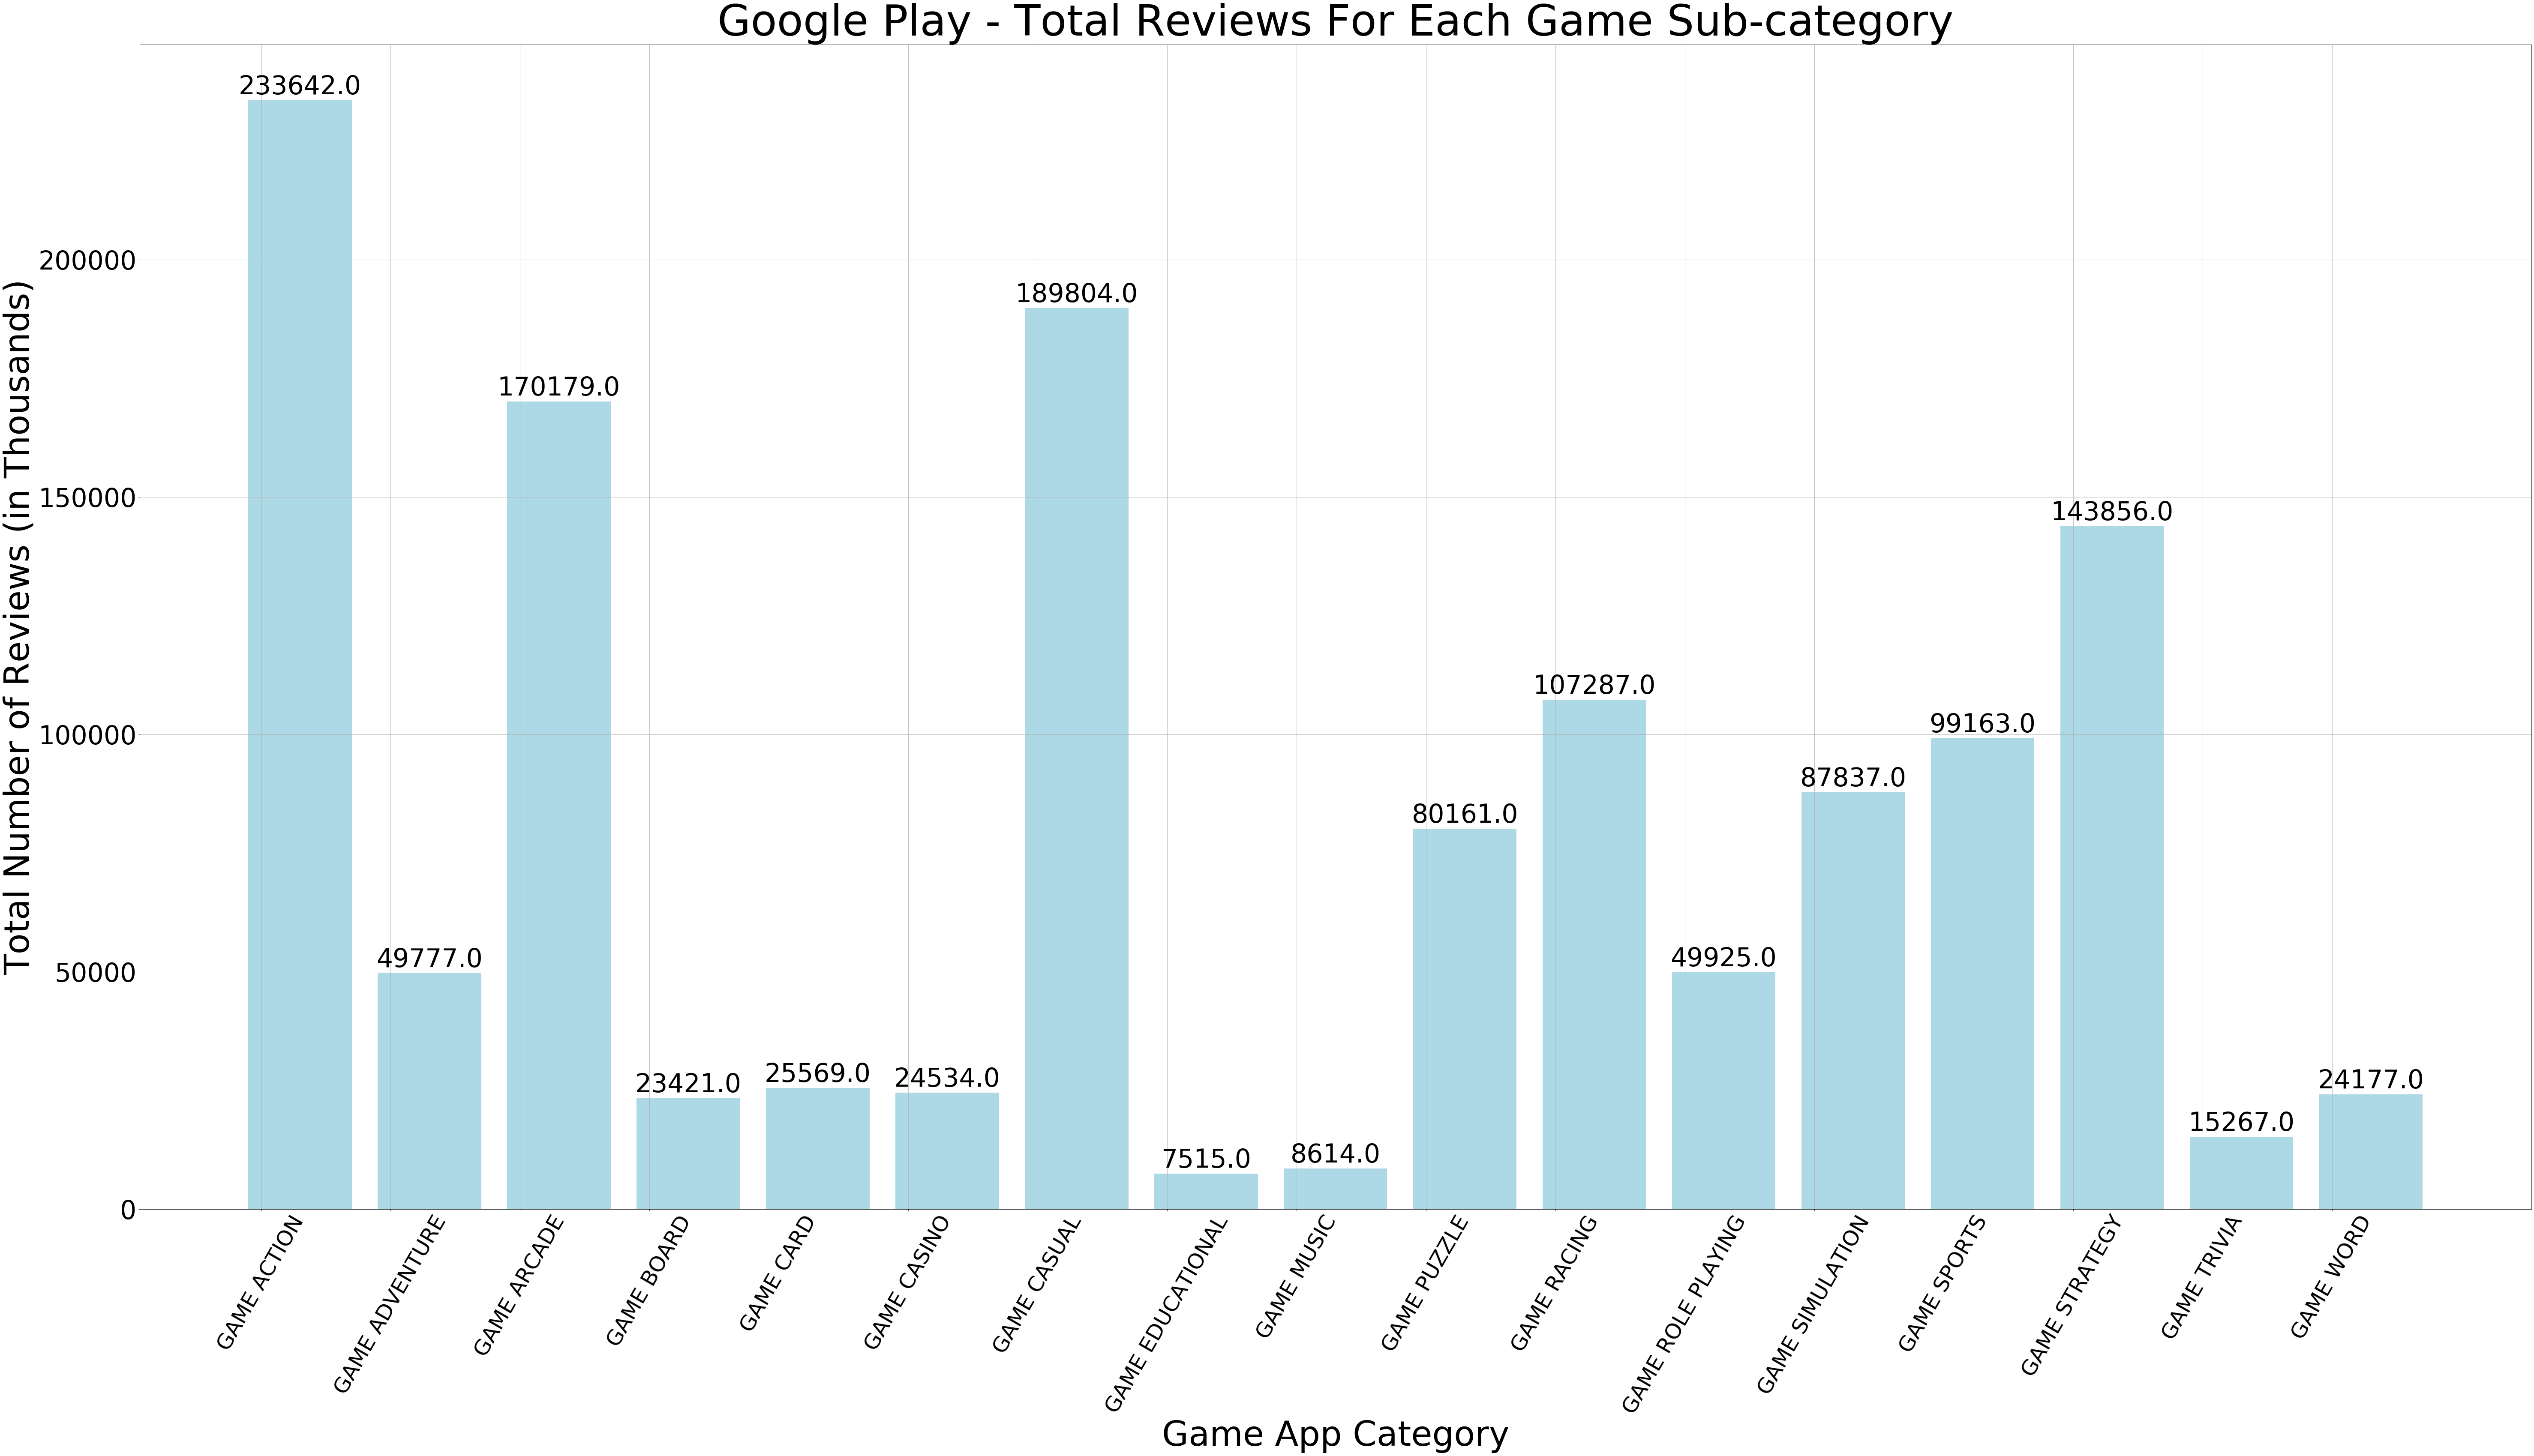

In [162]:
fig, ax = plt.subplots(figsize=(100,50))
x_index = np.arange(len(game_sub["Reviews"]))  
game_total_review = ax.bar(x_index[0:], game_review[0:], color='lightblue')
ax.set_title('Google Play - Total Reviews For Each Game Sub-category',fontsize=100)
ax.set_ylabel('Total Number of Reviews (in Thousands)',fontsize=80)
ax.set_xlabel('Game App Category',fontsize=80)
ax.set_xticks(x_index-0.3)
ax.tick_params(axis="y", labelsize=60)
ax.set_xticklabels(game_key,fontsize=50,rotation=60)
ax.grid(True)
label(game_total_review,60,100)

In [125]:
fig.savefig("Results/Game Category vs. Total Review.png")

In [32]:
game_avg_rating=game_sub["Rating"].mean()
game_avg_rating

Category
GAME ACTION          4.303365
GAME ADVENTURE       4.336793
GAME ARCADE          4.293161
GAME BOARD           4.320838
GAME CARD            4.339645
GAME CASINO          4.428440
GAME CASUAL          4.291058
GAME EDUCATIONAL     4.277876
GAME MUSIC           4.219272
GAME PUZZLE          4.417428
GAME RACING          4.200889
GAME ROLE PLAYING    4.378770
GAME SIMULATION      4.288640
GAME SPORTS          4.241321
GAME STRATEGY        4.338633
GAME TRIVIA          4.192537
GAME WORD            4.480203
Name: Rating, dtype: float64

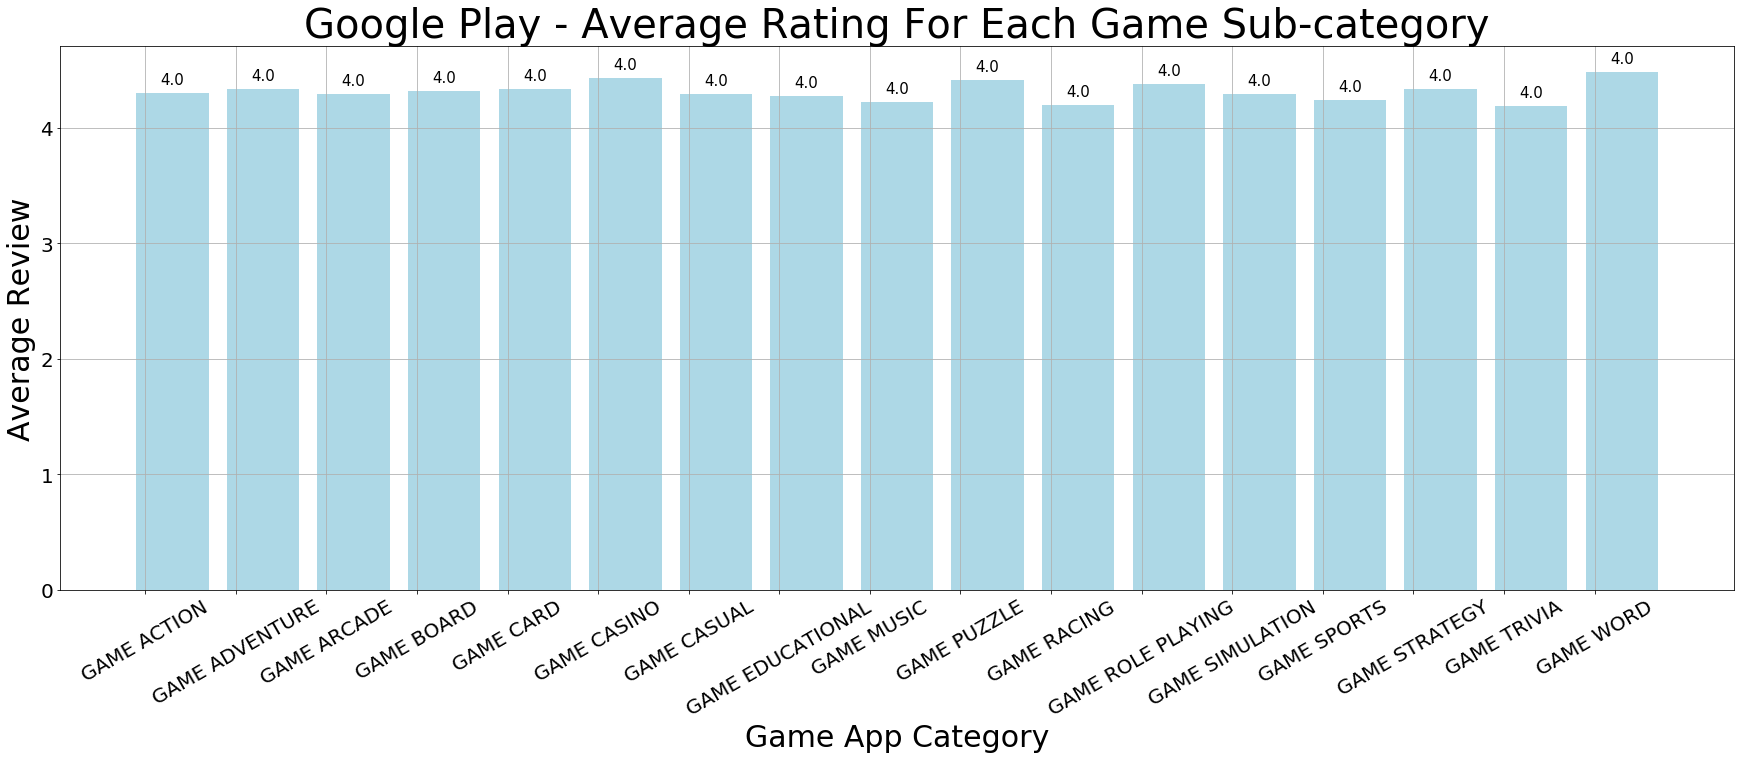

In [33]:
fig,ax = plt.subplots(figsize=(30,10))
x_index = np.arange(len(game_sub["Rating"]))  
game_avg_rating1 = ax.bar(x_index[0:], game_avg_rating[0:], color='lightblue')
ax.set_title('Google Play - Average Rating For Each Game Sub-category',fontsize=40)
ax.set_ylabel('Average Review',fontsize=30)
ax.set_xlabel('Game App Category',fontsize=30)
ax.set_xticks(x_index-0.3)
ax.tick_params(axis="y", labelsize=20)
ax.set_xticklabels(game_key,fontsize=20,rotation=30)
ax.grid(True)
label(game_avg_rating1,15,0.05)

In [173]:
fig.savefig("Results/Game Category vs. Avg Reviw.png")

In [51]:
game_price=game_df[game_df["Price"]!=0]
game_price=game_price.groupby(["Price"])
price_install=game_price["Installs"].sum()
price_key=game_price.groups.keys()

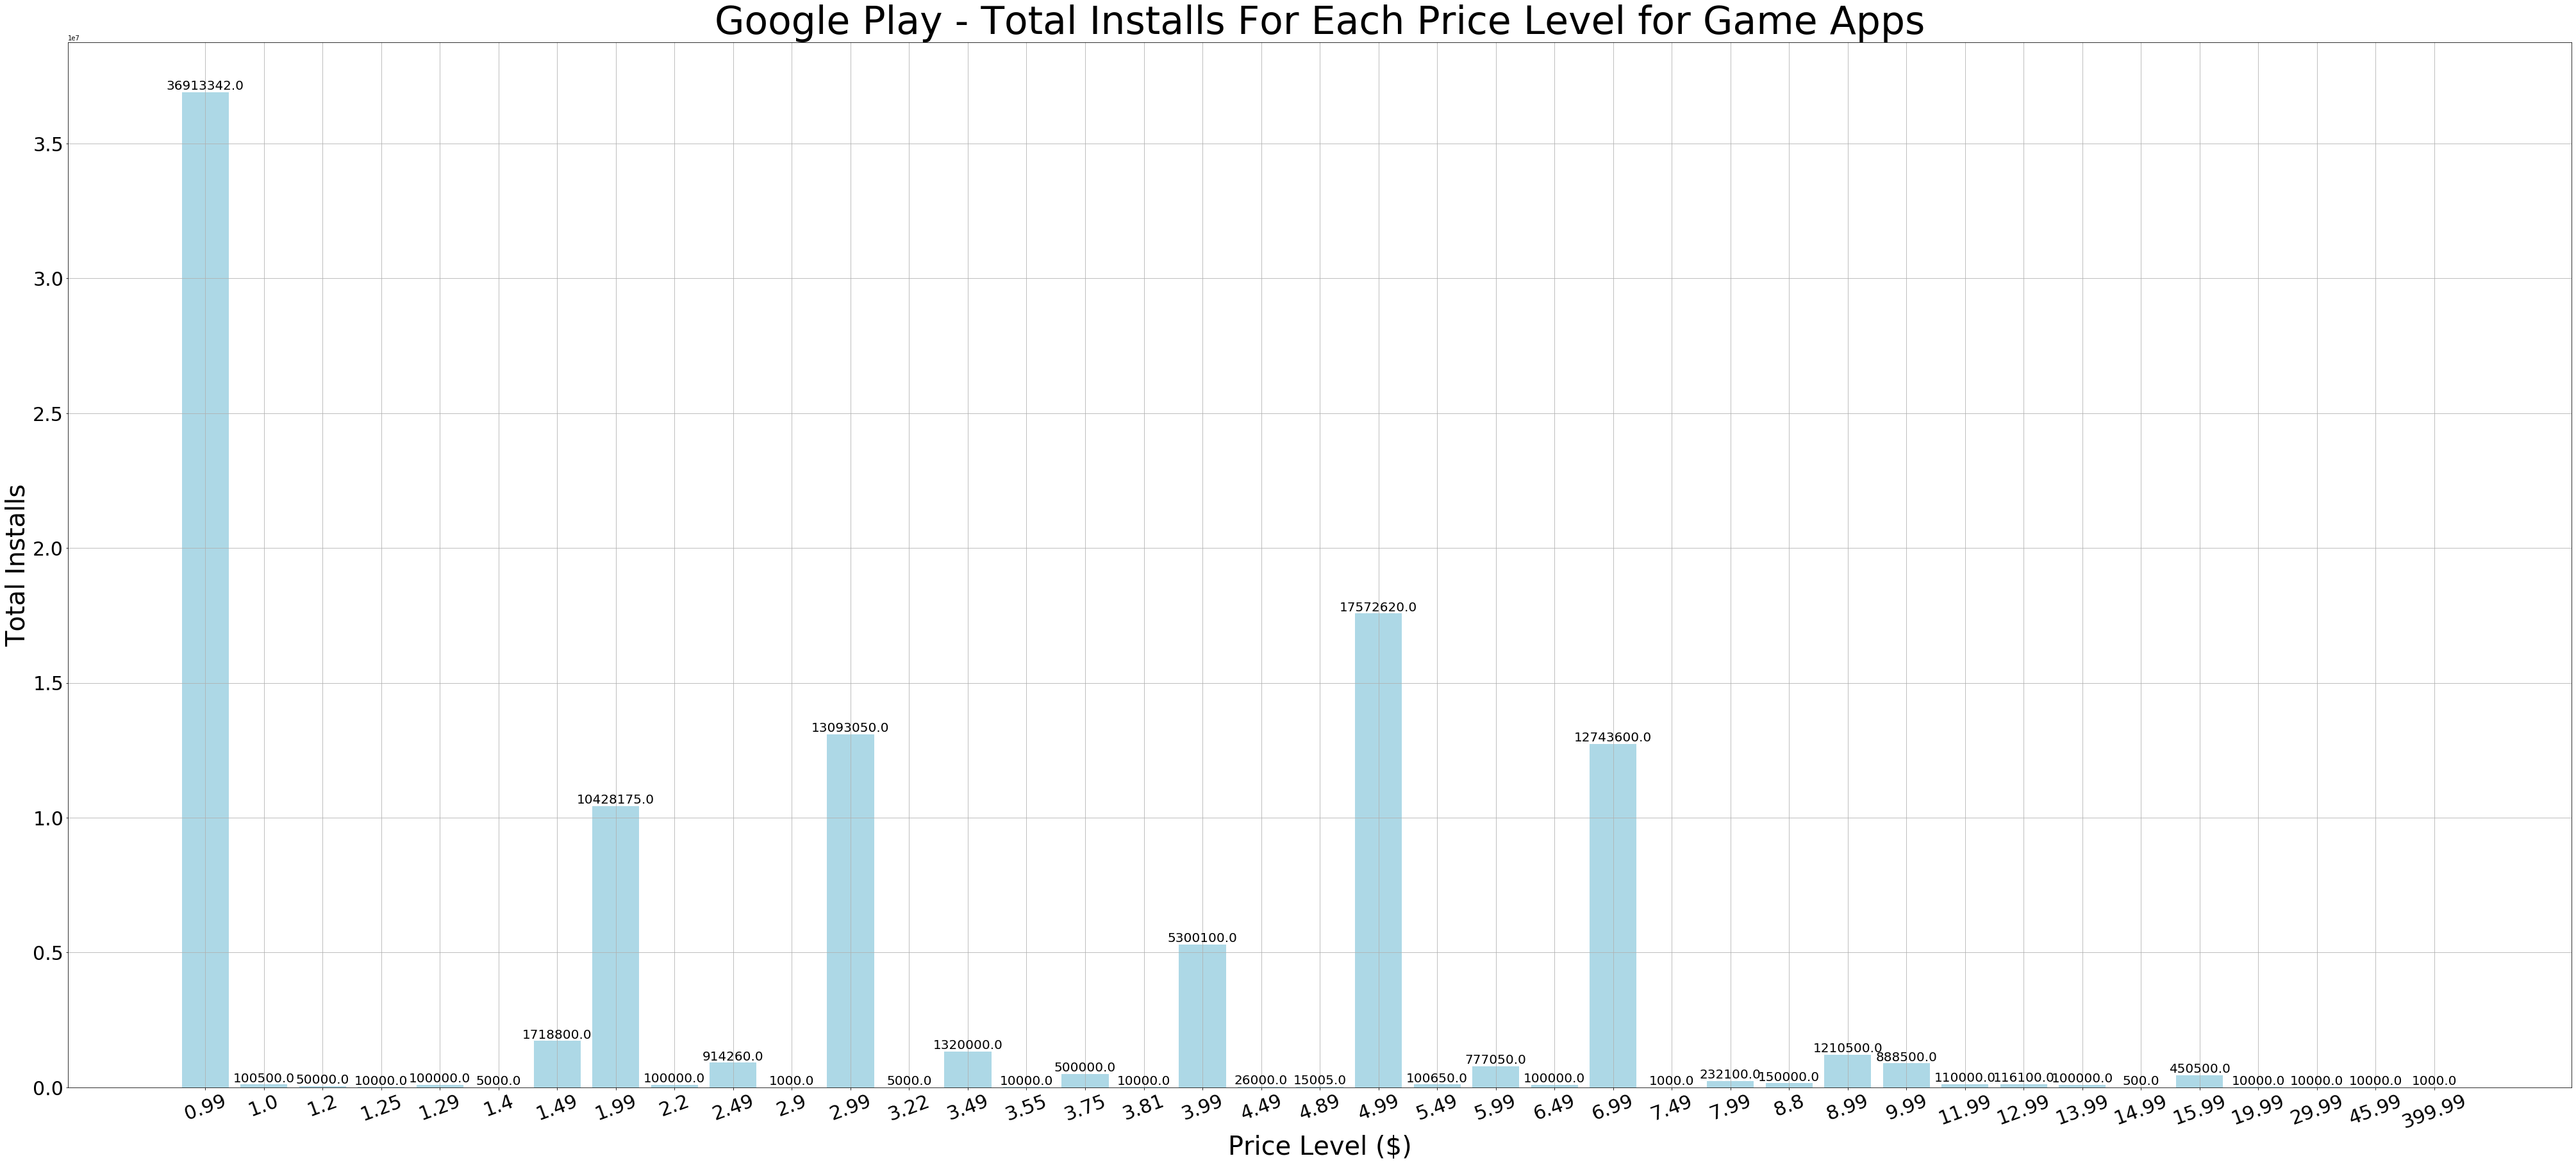

In [62]:
fig,ax = plt.subplots(figsize=(70,30))
x_index = np.arange(len(game_price["Price"]))  
price_vs_install = ax.bar(x_index[0:], price_install[0:], color='lightblue')
ax.set_title('Google Play - Total Installs For Each Price Level for Game Apps',fontsize=60)
ax.set_ylabel('Total Installs',fontsize=40)
ax.set_xlabel('Price Level ($)',fontsize=40)
ax.set_xticks(x_index)
ax.tick_params(axis="y", labelsize=30)
ax.set_xticklabels(price_key,fontsize=30,rotation=20)
ax.grid(True)
label(price_vs_install,20,15)

In [63]:
fig.savefig("Results/Game: Price vs. Total Install.png")